머신러닝 프로세스: 데이터 가공/변환 -> 모델 학습/예측 -> 평가  
앞에서 타이타닉 데이터 다룰 때는 모델 예측 성능 평가를 정확도(Accuracy)사용해서 평가함  
성능 평가 지표는 일반적으로 몰델이 분류냐 회귀냐에 따라 나뉨 => 회귀의 경우 대부분 실제값과 예측값의 오차 평균에 기반
### 오늘은 분류에 사용되는 성능 평가 지표에 대해 공부할 것이당!!
#### 분류의 성능 평가 지표 ( 결정 클래스 값 종류의 유형에 따라 이진 분류(결과값이2개)/ 멀티 분류로 나뉜다)
* 1. 정확도
* 2. 오차 행렬
* 3. 정밀도
* 4. 재현율
* 5. F1 스코어
* 6. ROC AUC

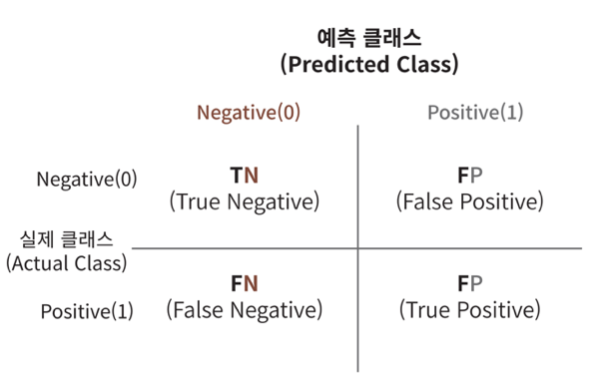  
* True Positive: 실제 Positive인 정답을 Positive라고 예측 (True)
* True Negative: 실제 Negative인 정답을 Negative라고 예측 (True)
* False Positive: 실제 Negative인 정답을 Positive라고 예측 (False) – Type I error
* False Negative: 실제 Positive인 정답을 Negative라고 예측 (False) – Type II error

**<i class="fa fa-question-circle"></i>:** 1종 오류, 2종 오류의 개념이 등장!!!  
이 두 유형의 오류는 분류 과제의 성격에 따라 경중이 다르다.  

-  중고차 성능 판별 과제에서는 1종 오류(False Positive), 즉 좋은 자동차라 예측하고 구매하였지만 실제로는 좋지 않은 자동차였을 경우가 더 치명적=>  좋은 중고차를 나쁜 차로 예측해서 구매하지 않더라도 손해볼 것이 없지만 나쁜 중고차를 좋은 차로 잘못 예측하여 구매하는 건 굉장한 손해니까~~  

- 분류 과제가 암환자 진단이라면 2종 오류(True Negative), 즉 암 환자를 건강하다고 판별하는 경우가 훨씬 치명적이다. 그 사람의 생명이 위험해질 수 있으니까.

# 01. 정확도(Accuracy)
전체 샘플의 개수들 중에서 얼마나 나의 알고리즘이 정답이라고 예측한 샘플이 포함되었는지의 비율을 의미!!  

예를 들어서, 내 알고리즘이 90% 정확하다면, 100개의 샘플들 중에서 90개만 정확하게 분류 하는 것.  
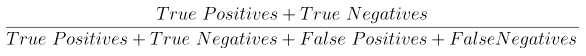


**<i class="fa fa-question-circle"></i>:** 단점 : 불균형한 레이블 값 분포에서 적합하지 않음!!  

- 100개의 데이터에서 90개의 데이터 레이블이 0, 10개의 데이터 레이블이 1이고, 모델이 무조건 예측 결과를 0으로 반환한다면 모델 성능이 좋지 않음에도 불구하고( 무조건 0으로 반환하니까!!!) 정확도가 90/90+10 = 90/100으로 90%!!
  
  즉, 모델이 멍청한데도 불구하고 평가를 좋게 한다는 거지~~

### MNIST 데이터 세트를 이용해서 불균형한 데이터 일 때, 정확도 지표 적용의 문제점을 확인해 보자!!  
- MNIST데이터 세트는 0~9까지의 숫자 이미지의 픽셀 정보를 가지고 있어, 숫자 Digit예측  
- Scikit_learn은 load_digits() API를 통해 MNIST데이터 세트 제공
- 0~9중 7만 True, 나머지 9개는 False인 불균형한 데이터 세트로 변형해서 사용해보자!

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class FakeClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    
    # 입력값으로 들어오는 X데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
                         
                         
# MINIST 데이터 로딩 => load_digits()이용 
digits =load_digits()

# 0~9의 숫자에서 7만 True, 나머지 9개는 False인 불균형한 데이터 세트로 변형해서 사용해보자! => astype사용
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y , random_state=11)

In [2]:
# 불균형한 데이터 y_test 데이터 분포도 확인 + FaskeClassifier로 예측하고 평가해보자
print('테스트 세트 크기 :', y_test.shape)
print('테스트 세트  0, 1 분포도')
print(pd.Series(y_test).value_counts())

fakeClf = FakeClassifier()
fakeClf.fit(X_train,y_train)
fakepred = fakeClf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 :{:3f}'.format(accuracy_score(y_test,fakepred)))

테스트 세트 크기 : (450,)
테스트 세트  0, 1 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900000


# 02. 오차 행렬  
학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 보여주는 평가 지표!! 
즉, 이진 분류의 예측오류가 얼마인지와 더불어 어떤 유형의 예측 오류가 발새하고 있는지를 알려준다  
- Scikitlearn은 오차행렬을 구하기 위해 confusion_matrix() API제공  => 오차 행렬을 배열 형태로 출력한다

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 위의 결과를 보면 TN = 405개 / FN = 45개 / FP=TP= 0개 
결과를 무조건 0으로 예측하도록 만들었기 때문에, FP(실제는 7이 아니지만[0이지만] 예측을 7[1]로 한 경우) + TP(실제는 7이지만[1이지만] 예측을 7로[1]로 한경우)는 0이 되는 것이다

### **<i class="fa fa-question-circle"></i>:** 이제 불균형한 데이터 세트에서 accuracy보다 더 선호되는 평가 지표인 정밀도, 재현율 공부해보자~~
- 정밀도와 재현율은 Positive 데이터 세트의 에측 성능에 좀 더 초점을 맞춘 평가 지표
- 암판단에서는 재현율이 정밀도보다 훨씬 중요 (앞에서 말한 것 처럼, 실제 암인데 아니라고 판단하면 안되니까)
- 스팸메일, 중고차 거래에는 정밀도가 재현율 보다 중요 ( 좋은 자동차여서 구매했는데 나쁘면 안좋음, 나쁜 자동차를 구매했는데 좋으면 좋음/ 스팸메일이여서 안받았는데 중요 메일이면 큰일남..중요 메일이여서 받았는데 스팸메일이였으면 그냥 삭제하면 됨)
- 뭐가 더 치명적일지 생각해보면 정밀도가 중요한지, 재현율이 더 중요한지 판단할 수 있겠띠~ ~~ ~???

#### 공식을 보면 정밀도, 재현율 모두 TP를 높이는데 초점을 둔다는 공통점!!
#### 차이점은 정밀도는 FP를 낮추는 데 초점을 두고, 재현율은 FN을 낮추는데 초점을 둔다!!
#### 따라서 이 둘은 서로 보완적인 지표로 분류의 성능을 평가한다 BUT, 둘다 높으면 아주 BEST / 하나만 높고 하나는 너무 낮으면 아주 WORST!!!!

# 03. 정밀도
- 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치하는 데이터 비율을 뜻함
- 즉, TP / ( FP + TP )
- 분모는 예측을 모두 Positive로 한경우 , 분자는 예측=실제= 모두 Positive
- Scikilearn에서 precision_score()

# 04. 재현율
- 실제값이 Positive인 대상 중에 예측 값이 Positive로 실제값과 일치하는 데이터 비율을 뜻함
- 즉, TP / ( FN + TP )
- 분모는 실제 값이 모두 Positive인 경우 , 분자는 예측=실제= 모두 Positive
- 민감도(Sensitivity) 혹은 TPR이라고도 불린다,
- Scikilearn에서 recall_score()

# 정확도, 정밀도, 재현율 모두 사용해보자!!!
- 1. confusion_matrix, accuracy_score, precision_score, recall_score 모두 함수로 묶기
- 2. 타이타닉 데이터 불러오고 데이터 가공, 학습/테스트 데이터로 분할
- 3. 로지스틱 회귀 기반으로 생존자 예측
- 4. 1단계에서 만든 함수 호출해서 평가 수행

In [4]:
# 1단계
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [5]:
# 2단계_1 원본 데이터를 재로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./TEST/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

In [6]:
# 2단계_2 데이터 가공, 학습데이터/테스트 데이터 분할.
from sklearn import preprocessing
#1.NULL 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def formoat_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df =formoat_features(df)

    return df

X_titanic_df = transform_features(X_titanic_df)

In [7]:
# 2단계_3 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)
# 3단계 로지스틱 회귀
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

# 4단계 평가수행
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\wjdgu\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## => 정밀도에 비해 재현율이 낮게 나옴

# 정밀도/ 재현율 트레이드 오프
- 정밀도/재현율 트레이드 오프란? : 정밀도와 재현율을 상호 보완적이기 때문에 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.

# predict_proba()
- Scikitlearn에서 개별 데이터 별로 예측 확률을 반환하는 메서드
- 학습이 완료된 Scikilearn Classifier객체에서 호출이 가능
- 테스트 피처 데이터 세트를 파라미터로 입력해주면 레코드으 개별 클래스 예측 확률을 반환한다.
- predict()메서드와 유사하지만 반환결과가 예측 결과 클래스값 XX => 예측 확률 결과임!!!!!!

**<i class="fa fa-question-circle"></i>:** 입력 파라미터 : predict()와 동일하게 보통 테스트 피처 데이터 세트 (X_test)  
**<i class="fa fa-question-circle"></i>:** 반환값 : 개별 클레스 예측 확률을 ndarray m* n (m:입력값의 레코드 수 * n: 클래스 값 유형) 형태   
 => 입력 테스트 데이터 세트의 표본 개수가 100개이고 예측 클래스 값 유형이 이진 분류(2개)라면 100* 2 ndarray로 반환
 => 각 열(n)은 개별 클레스의 예측 확률, 이진 분류에서는 첫번째 칼럼은 0 Negative/ 두번째는 1 Positive

In [8]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


- 한 행의 첫번째 두번째 칼럼 값을 더하면 1이 된다. => 0.46162417 + 0.53837583 / 0.87858538 + 0.12141462 / ...

-  predict()는 predict_proba()호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는  API
- 즉, predict_proba()메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임계값을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정
### 이러한 구현을 위해 ScikitLearn의 Binarizer클래스를 사용!!!

**<i class="fa fa-question-circle"></i>:**  Binarizer 간단 구현방법

In [9]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 이제 이  Binarizer클래스를 사용해서 predict()의 의사 코드를 만들어 보자!!
- 로지스틱 회귀객제의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값 pred_proba 객체 변수에   
- 분류 결정 임계값(threshold)을 0.5로 지정한 Binarizer클래수를 적용 => 최종예측값을 구한다
- 최종 예측 값에 get_clf_eval()함수를 저굥해 평가 지표를 알아본다

In [10]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

# 추출한 것에  Binarizer를 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

# 최종예측값의 평가 지표
get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


###  분류 결정 임계값(threshold)을 0.4로 낮춘다면???

In [11]:

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


- 임계값을 낮춤으로서 재현율이 증가하고, 정밀도가 떨어짐
- 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 되기 때문!!
- 즉, 분류 결정 임계값을 낮춤으로써 Positive 예측을 너그럽게 하고 이 때문에  True값이 많아 지게 때문이다

###  분류 결정 임계값(threshold)을 0.4~0.6까지 변화시키고 평가 지표 차이를 확인해보자

In [12]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


## 결과를 보면 0.5와 0.45의 정확도값은 동일!!
## 단, 0.45일때가 0.5일 때보다 재현율은 증가, 정밀도는 감소함
### 만약, 재현율을 향상시키면서 다른 수치의 감소는 희생한다면 임계값으로 가장 적다한 값은 0.45가 되는 것!!!

# precision_recall_curve()
- 위에 처럼 임계값 변화에 따른 평가지표 값을 알 수 있도록하는 Sicikitlearn API()
- 임계값에 따른 정밀도, 재현율의 값 변화를 곡선 그래프로 시각화 가능  

**<i class="fa fa-question-circle"></i>:** 입력 파라미터  
- y_true :실제 클레스값 배열 (배열 크기 = [데이터 건수])
- probas_pred : Positive 칼럼의 예측 확률 배열 (배열 크기 = [데이터 건수])  

**<i class="fa fa-question-circle"></i>:** 반환값  
- 정밀도 : 임계값별 정밀도 값을 배열로 반환
- 재현율 : 임곗값별 재현율 값을 배열로 반환

- precision_recall_curve()의 인자로 실제 값 데이터 세트와 레이블 값이 1일때의 예측 확률값을 입력  
- 레이블 값이 1일 때의 예측 확률 값은 predict_proba(X_test)[:,1]로 predict_proba()의 반환 ndarray의 두번째 칼럼(칼럼 인덱스1)에 해당하는 데이터 세트
- precision_recall_curve()은 보통 0.11~0.95정도의 임곗값을 담은 ndarray와 이 임곗값에 해당하는 정밀도+재현율을 담은 ndarray반환

In [17]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print(precisions.shape)
print(recalls.shape)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

(144,)
(144,)
반환된 분류 결정 임곗값 배열의 Shape: (143,)


In [19]:
#반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [20]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


#### =>  임계값이 증가할 수록 정밀값은 증가, 재현율은 감소
- precison_recall_curve()로 값 변화 시각화

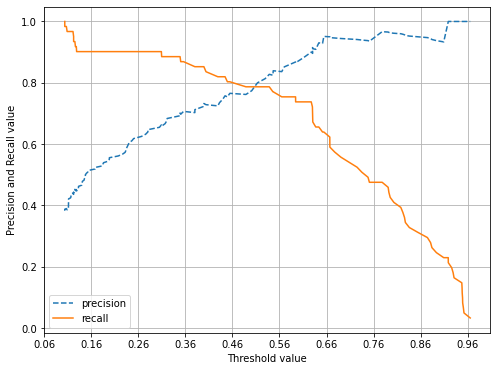

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
0.47정도에서 정밀도, 재현율 비슷

# 05. F1 스코어
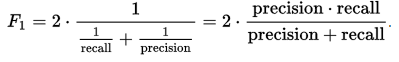
- 정밀도와 재현율의 평균  
- F1 Score값이 높으면 성능이 높다 할 수 있음
- 만약 A가 정밀도 0.9, 재현율 0.1이면 F1 = 0.18 / B는 둘다 0.5라면 F1 =0.5 =>즉, B가 더 우수
- ScikitLearn은 f1_scor()API제공

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print(f1)

0.7804878048780488


- 임계값(threshold)변화시킬때, f1 Score포함한 평가지표

In [25]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


# 06. ROC곡선, AUC
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- ROC곡선은 FP율(FPR)이 변할 때 TP율(TPR)이 어떻게 변하는지 나타내는 곡선. FPR 이 X축, TPR이 y축
- TPR은 재현율을 나타냄, 그리고 재현율은 민감도라고도 불리고, 이 민감도에 대응하는 지표로 특이성(TNR)이 있음
- TNR(특이성) = TN / (FP + TN)
- FPR = FP/ FP+TN 이므로 => 1-TNR = 1- 특이성
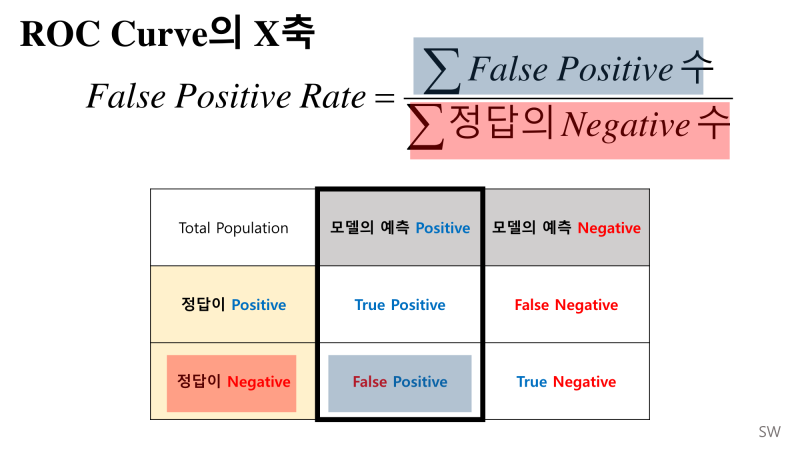
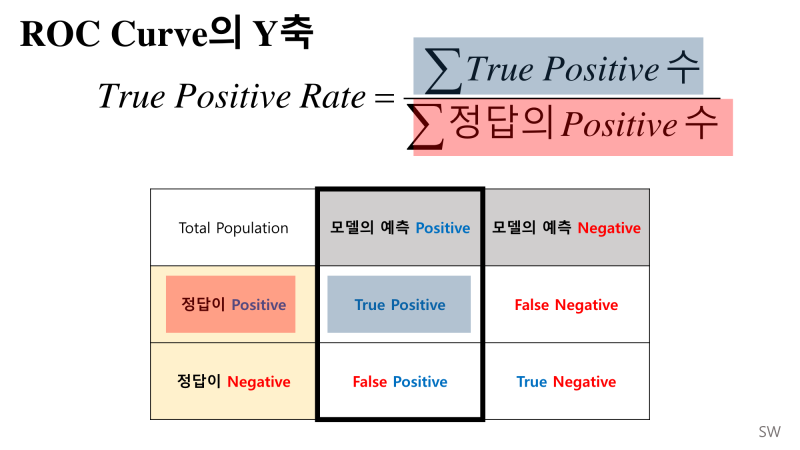

- ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
- FPR을 0~1변화시키는 방법은 분류결정임계값을 변경하면 된다 
    => FPR을 0으로 만들기 위해서는 임계값을 1로 지정
    => 임계값이 1이되면 Positive예측 기분이 높아지기 때문에 분류기가 임계값보다 높은 확률을 가지 데이터를 Positive로 예측할 수 없음
    => FPR을 1로 만들기 위해서는 TN을 0으로 만들면 됨 즉, 임계값을 0으로 지정

## ScikitLearn은 ROC곡선 만들기 위해 roc_curve() API제공
**<i class="fa fa-question-circle"></i>:** 입력 파라미터  
- y_true :실제 클레스값 배열 (배열 크기 = [데이터 건수])
- y_score : predict_proba()의 반환 값 array에서 Positive칼럼의 예측 확률이보통 사용 (배열 크기 = [데이터 건수])  

**<i class="fa fa-question-circle"></i>:** 반환값  
- fpr: 배열로 반환
- tpr: 배열로 반환
- thresholds : 임계값 array

In [27]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임곗값별 TPR:  [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


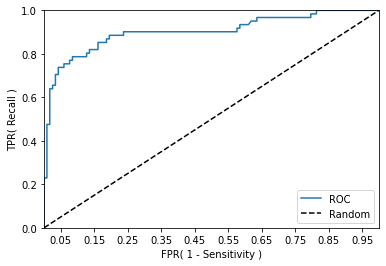

In [28]:

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

파란색이 ROC곡선, 가운데 대각선에서 멀리떨어질수록 성능이 좋은 것  
ACU값은 ROC곡선 밑의 면적을 구한 것=> 일반적으로 1에 가까울수록 좋음  
ACU값이 커지려면 ROC곡선이 왼쪽 모서리로 더 이동해서 거의 직사각형에 가까워져야함
=> FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건

In [34]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))


ROC AUC 값: 0.9024


In [35]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))